# Data Augmentation To Address Overfitting In Flower Classification CNN

1. In this notebook we will build a CNN to classify flower images. 
2. We will also see how our model overfits and how overfitting can be addressed using data augmentation.
3. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

# Credits
1.  https://www.tensorflow.org/tutorials/images/classification 
2. https://codebasics.io/courses/deep-learning-with-tensorflow-keras-and-python

**Data Augmentation**
In below image, 4 new training samples are generated from original sample using different transformations

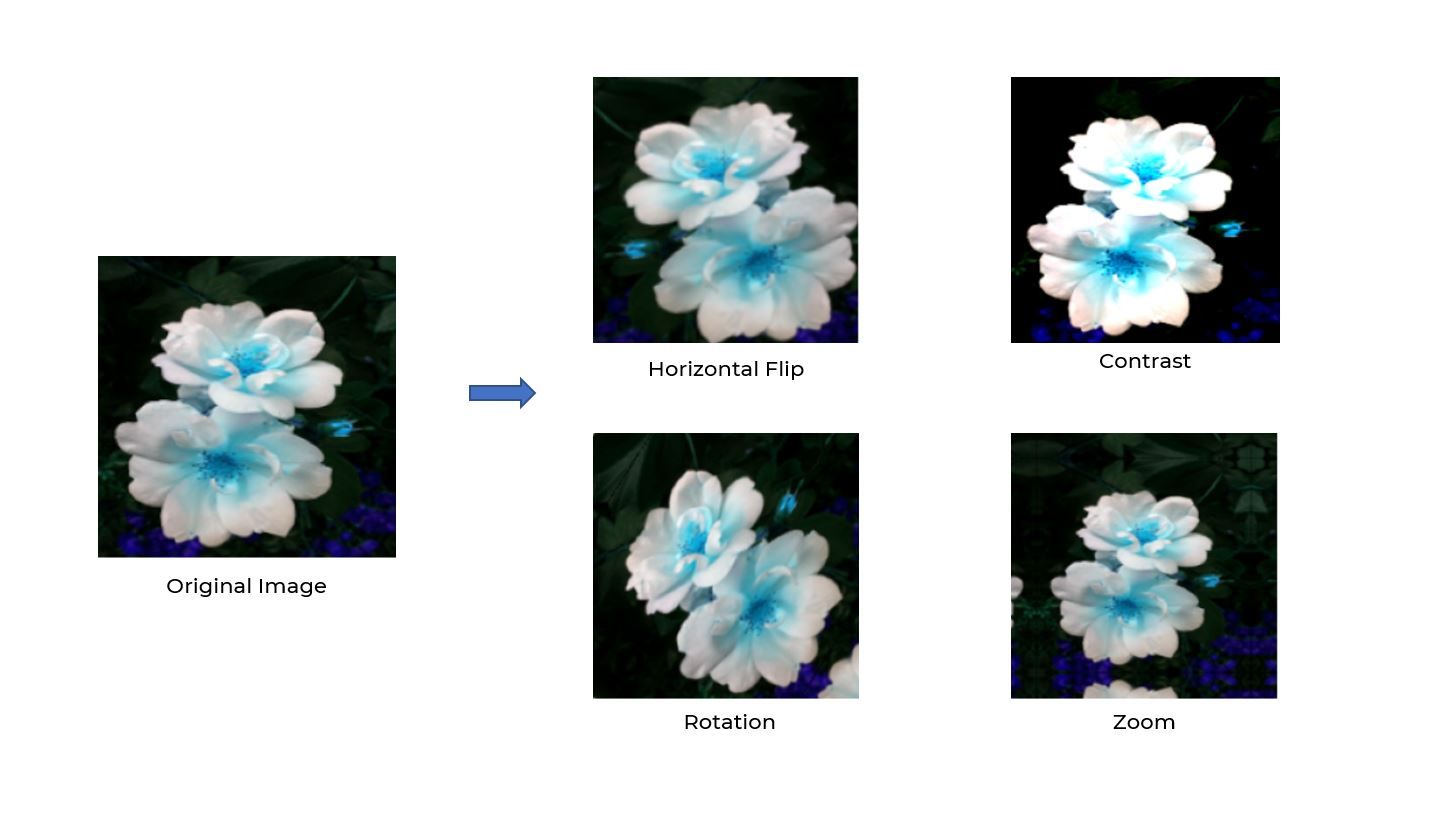

In [1]:
from IPython.display import Image
Image("../input/daisy-flower/daisy2.JPG")

# 1. Import Python modules

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import pathlib

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# 2. Load flowers dataset

1. We will download flowers dataset from google website and store it locally. 
2. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 1s 0us/step


In [4]:
data_dir = pathlib.Path(data_dir)
print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

datasets/flower_photos


[PosixPath('datasets/flower_photos/tulips/4263272885_1a49ea5209.jpg'),
 PosixPath('datasets/flower_photos/tulips/14057246122_8598b665bd.jpg'),
 PosixPath('datasets/flower_photos/tulips/7166606598_5d2cd307c3.jpg'),
 PosixPath('datasets/flower_photos/tulips/5470898169_52a5ab876c_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8454719295_4276c0e9c5_n.jpg')]

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/4921988677_e2eb0c9a24_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15274443248_76b9f3eb24.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg')]

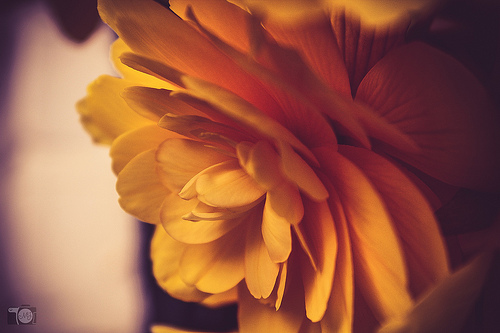

In [7]:
PIL.Image.open(str(roses[1]))

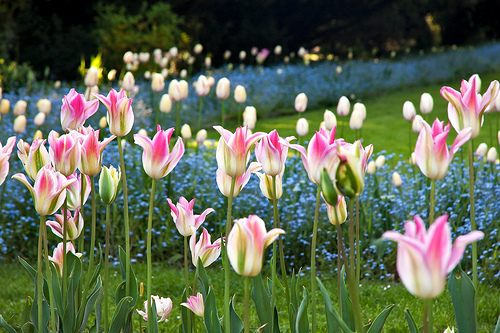

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

# 3. Read flowers images from disk into numpy array using opencv

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/4921988677_e2eb0c9a24_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15274443248_76b9f3eb24.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg')]

In [12]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
print(img.shape)
cv2.resize(img,(180,180)).shape

(333, 500, 3)


(180, 180, 3)

In [14]:
X, Y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        Y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
Y = np.array(Y)

# 4. Train test split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# 5. Preprocessing: scale images

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# 6. Build convolutional neural network and train it

In [18]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
              
model.fit(X_train_scaled, Y_train, epochs=30)              

2022-07-28 02:27:50.840423: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 02:27:50.960775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 02:27:50.961626: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-28 02:27:50.962911: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Epoch 1/30


2022-07-28 02:27:57.865206: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


86/86 [==============================] - 9s 14ms/step - loss: 1.3671 - accuracy: 0.3932
Epoch 2/30
86/86 [==============================] - 1s 13ms/step - loss: 1.0400 - accuracy: 0.5887
Epoch 3/30
86/86 [==============================] - 1s 13ms/step - loss: 0.8391 - accuracy: 0.6802
Epoch 4/30
86/86 [==============================] - 1s 13ms/step - loss: 0.6679 - accuracy: 0.7529
Epoch 5/30
86/86 [==============================] - 1s 13ms/step - loss: 0.4959 - accuracy: 0.8183
Epoch 6/30
86/86 [==============================] - 1s 13ms/step - loss: 0.2882 - accuracy: 0.9052
Epoch 7/30
86/86 [==============================] - 1s 13ms/step - loss: 0.1544 - accuracy: 0.9535
Epoch 8/30
86/86 [==============================] - 1s 13ms/step - loss: 0.1074 - accuracy: 0.9706
Epoch 9/30
86/86 [==============================] - 1s 13ms/step - loss: 0.0808 - accuracy: 0.9786
Epoch 10/30
86/86 [==============================] - 1s 14ms/step - loss: 0.1163 - accuracy: 0.9648
Epoch 11/30
86/86 [=

In [19]:
model.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 0s 11ms/step - loss: 2.6581 - accuracy: 0.6394


[2.6581315994262695, 0.6394335627555847]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [20]:
predictions = model.predict(X_test_scaled)
predictions
print(np.argmax(predictions[0]))

1


# 7. Train the model using data augmentation and a drop out layer

In [21]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180, 3)), 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [22]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
              
model.fit(X_train_scaled, Y_train, epochs=30)    

2022-07-28 02:29:23.079856: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1069977600 exceeds 10% of free system memory.
2022-07-28 02:29:24.234023: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1069977600 exceeds 10% of free system memory.


Epoch 1/30
86/86 [==============================] - 2s 16ms/step - loss: 1.3724 - accuracy: 0.4139
Epoch 2/30
86/86 [==============================] - 1s 15ms/step - loss: 1.0754 - accuracy: 0.5636
Epoch 3/30
86/86 [==============================] - 1s 15ms/step - loss: 0.9720 - accuracy: 0.6177
Epoch 4/30
86/86 [==============================] - 1s 16ms/step - loss: 0.9116 - accuracy: 0.6515
Epoch 5/30
86/86 [==============================] - 1s 17ms/step - loss: 0.8254 - accuracy: 0.6788
Epoch 6/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7914 - accuracy: 0.6897
Epoch 7/30
86/86 [==============================] - 2s 19ms/step - loss: 0.7494 - accuracy: 0.7086
Epoch 8/30
86/86 [==============================] - 1s 15ms/step - loss: 0.7396 - accuracy: 0.7180
Epoch 9/30
86/86 [==============================] - 1s 15ms/step - loss: 0.6907 - accuracy: 0.7380
Epoch 10/30
86/86 [==============================] - 1s 15ms/step - loss: 0.6775 - accuracy: 0.7402
Epoch 11/

In [23]:
model.evaluate(X_test_scaled,Y_test)

29/29 [==============================] - 0s 9ms/step - loss: 0.8925 - accuracy: 0.7353


[0.8925464153289795, 0.7352941036224365]

# 8. Summary

1. We can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased.